In [1]:
import pickle
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

%config InlineBackend.figure_format = 'retina'

In [134]:
BENCH_NAME = "ur5_reach"


def load_max_iter_files(max_iter):
    basepath = Path(f"{BENCH_NAME}_{max_iter}")
    all_csv = list(basepath.glob("*.csv"))
    all_pkl = list(basepath.glob("*.pkl"))
    nr = len(all_csv)

    dfs = []
    suppl_data = {}
    for i in range(nr):
        dfs.append(pl.read_csv(all_csv[i]))
        with open(all_pkl[i], "rb") as f:
            suppl_data.update(pickle.load(f))
    df = pl.concat(dfs)
    return df, suppl_data


def get_solver_config(supp_entry):
    return supp_entry["solver"]

In [135]:
# max_iter_vals = [50 * i for i in range(1, 9)]
# print(max_iter_vals)

# df_to_stitch_ = []
# suppl_data_ = {}
# for max_iter in max_iter_vals:
#    df_i, suppl_data_i = load_max_iter_files(max_iter)
#    df_to_stitch_.append(df_i)
#    suppl_data_.update(suppl_data_i)

# df_ = pl.concat(df_to_stitch_)
# df_ = df_.with_columns(avg_iter_time = (pl.col("solve_time_s") / pl.col("niter")))
# assert df_.shape[0] == len(suppl_data_)
# df_

In [136]:
df_, suppl_data_ = load_max_iter_files(400)

Create aliases for the unique configurations

In [137]:
solver_configs_ = [
    {**entry["solver"], "run_id": run_id} for run_id, entry in suppl_data_.items()
]

In [138]:
sc_df = pl.DataFrame(solver_configs_)
sc_df

name,config_name,mu_init,tol_stationarity,verbose,max_iters,run_id,default_start,rollout_type,print_level
str,str,f64,f64,bool,i64,str,bool,str,i64
"""ALTRO""","""ALTRO:0""",1.0,0.0001,false,400,"""4535718ecc394eb5bed62e9881693a…",null,null,null
"""ProxDDP""","""ProxDDP:0""",1.0,null,false,400,"""1320201cc3074c28acffc4346dc0bd…",false,"""nonlinear""",null
"""ProxDDP""","""ProxDDP:1""",0.1,null,false,400,"""a07eaeef882f4d7fa3aa420ce27f9d…",false,"""nonlinear""",null
"""ProxDDP""","""ProxDDP:2""",0.01,null,false,400,"""45a9bf04e37e4cdbaa78ad503f24cb…",false,"""nonlinear""",null
"""ProxDDP""","""ProxDDP:3""",0.1,null,false,400,"""39d618bb902e41ae9bf6c5fdb41c8a…",false,"""linear""",null
…,…,…,…,…,…,…,…,…,…
"""ProxDDP""","""ProxDDP:0""",1.0,null,false,400,"""e5b39b26d9a64981b0d01cf42c499a…",false,"""nonlinear""",null
"""ProxDDP""","""ProxDDP:1""",0.1,null,false,400,"""fc10506c36da41c6a3da020d740a19…",false,"""nonlinear""",null
"""ProxDDP""","""ProxDDP:2""",0.01,null,false,400,"""8b3b40c4499d46bfab203bd70d4a8f…",false,"""nonlinear""",null


In [139]:
config_names = sc_df["config_name"].unique()
config_names

config_name
str
"""ALTRO:0"""
"""Ipopt:0"""
"""ProxDDP:3"""
"""ProxDDP:2"""
"""ProxDDP:1"""
"""ProxDDP:0"""


In [140]:
df_fused = df_.join(sc_df, ["run_id", "name"])
df_fused

name,run_id,instance,status,traj_cost,niter,prim_feas,dual_feas,solve_time_s,nsteps,config_name,mu_init,tol_stationarity,verbose,max_iters,default_start,rollout_type,print_level
str,str,str,str,f64,i64,f64,f64,f64,i64,str,f64,f64,bool,i64,bool,str,i64
"""ALTRO""","""4535718ecc394eb5bed62e9881693a…","""UR5_Reach_10""","""CONVERGED""",0.013571,18,0.000039,0.000065,0.179675,100,"""ALTRO:0""",1.0,0.0001,false,400,null,null,null
"""ProxDDP""","""1320201cc3074c28acffc4346dc0bd…","""UR5_Reach_10""","""CONVERGED""",0.058036,56,0.000024,0.000034,0.485478,100,"""ProxDDP:0""",1.0,null,false,400,false,"""nonlinear""",null
"""ProxDDP""","""a07eaeef882f4d7fa3aa420ce27f9d…","""UR5_Reach_10""","""CONVERGED""",0.018335,81,0.000089,0.000065,0.640474,100,"""ProxDDP:1""",0.1,null,false,400,false,"""nonlinear""",null
"""ProxDDP""","""45a9bf04e37e4cdbaa78ad503f24cb…","""UR5_Reach_10""","""CONVERGED""",0.17878,82,0.000003,0.000046,0.962497,100,"""ProxDDP:2""",0.01,null,false,400,false,"""nonlinear""",null
"""ProxDDP""","""39d618bb902e41ae9bf6c5fdb41c8a…","""UR5_Reach_10""","""CONVERGED""",0.043706,72,0.000076,0.000027,0.707048,100,"""ProxDDP:3""",0.1,null,false,400,false,"""linear""",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ProxDDP""","""e5b39b26d9a64981b0d01cf42c499a…","""UR5_Reach_18""","""CONVERGED""",0.131063,25,0.000059,0.000096,0.187362,100,"""ProxDDP:0""",1.0,null,false,400,false,"""nonlinear""",null
"""ProxDDP""","""fc10506c36da41c6a3da020d740a19…","""UR5_Reach_18""","""CONVERGED""",0.047624,69,0.000071,0.000021,0.497867,100,"""ProxDDP:1""",0.1,null,false,400,false,"""nonlinear""",null
"""ProxDDP""","""8b3b40c4499d46bfab203bd70d4a8f…","""UR5_Reach_18""","""MAXITERATIONS""",60.189015,400,0.193094,189.973337,4.516772,100,"""ProxDDP:2""",0.01,null,false,400,false,"""nonlinear""",null


In [141]:
expr_ok = pl.col("status") == "CONVERGED"
df_ok = df_fused.filter(expr_ok)

g = df_ok.group_by("config_name")
df_niter = g.agg(pl.col("niter").sort())
df_niter = df_niter.sort("config_name")
df_niter

config_name,niter
str,list[i64]
"""ALTRO:0""","[7, 8, … 334]"
"""Ipopt:0""","[97, 99, … 317]"
"""ProxDDP:0""","[20, 23, … 269]"
"""ProxDDP:1""","[22, 23, … 115]"
"""ProxDDP:2""","[22, 26, … 282]"
"""ProxDDP:3""","[31, 33, … 313]"


In [142]:
iterr = np.arange(1, 401)

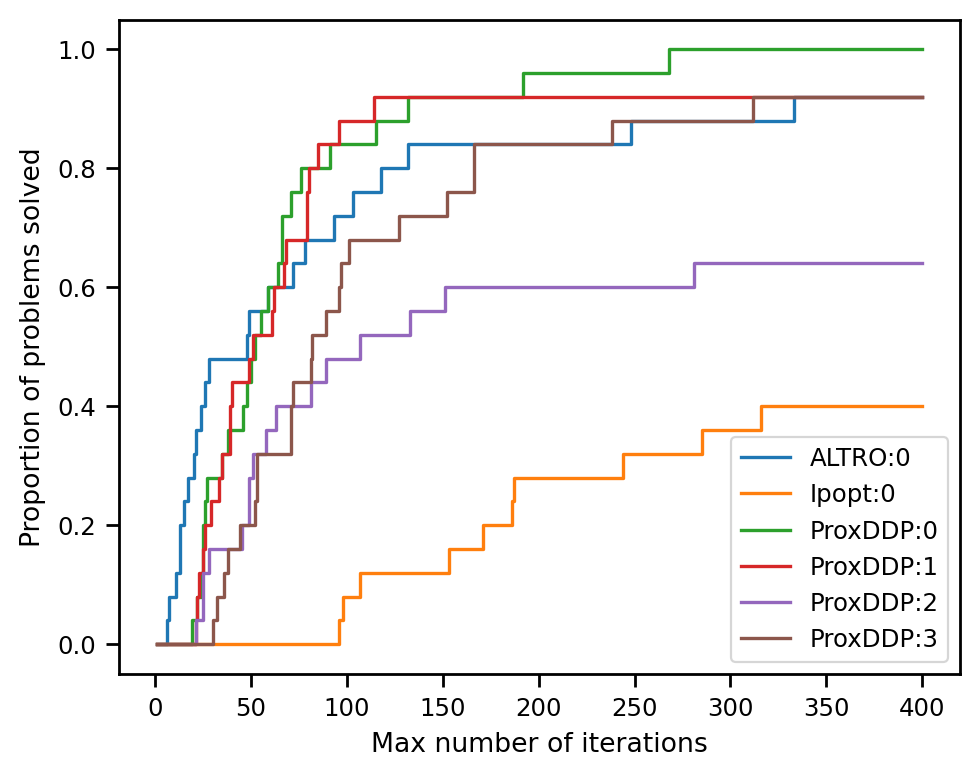

In [143]:
fig = plt.figure(figsize=(5, 4))

for row in df_niter.iter_rows():
    lab = row[0]
    mask = iterr[:, None] >= np.asarray(row[1])
    counts = mask.sum(axis=1) / 25
    plt.step(iterr, counts, label=lab)

plt.xlabel("Max number of iterations")
plt.ylabel("Proportion of problems solved")
plt.ylim((-0.05, 1.05))
plt.legend()
plt.tight_layout()

In [144]:
fig.savefig(f"{BENCH_NAME}_iterations.pdf")
fig.savefig(f"{BENCH_NAME}_iterations.png")